<a href="https://colab.research.google.com/github/Najla-Sh/salary_prediction/blob/main/project_Pathrise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Data_Pathrise_cleaned.xlsx to Data_Pathrise_cleaned.xlsx


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn import metrics

In [ ]:
df = pd.read_excel('Data_Pathrise_cleaned.xlsx')
df

,id,track,days,placed,employment_status,education,job_search,challenge,experience,visa,interviews,applications
0,5,SWE,89,1,Unemployed,Bachelor,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10,100
1,8,SWE,19,0,Employed Part-Time,Bachelor,0-1 month,Getting past final round interviews,1-2 years,Citizen,4,15
2,24,PSO,193,1,Unemployed,Master,6-12 months,Hearing back on my applications,1-2 years,Citizen,5,4
3,31,SWE,73,1,Student,Master,0-1 month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0,1
4,40,SWE,83,1,Employed Full-Time,Master,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...
938,2528,SWE,31,1,Student,Bachelor,1-2 months,Figuring out which jobs to apply for,Less than one year,Citizen,6,6
939,2529,Design,277,1,Student,PHD,0-1 month,Technical interviewing,5+ years,Other,2,45
940,2532,SWE,310,1,Unemployed,PHD,0-1 month,Technical skills,1-2 years,F1 Visa/OPT,0,6
941,2534,Design,33,1,Student,Bachelor,1-2 months,Hearing back on my applications,3-4 years,F1 Visa/OPT,0,9


In [ ]:
# to test correlation to see if any pair variables are highly correlated or not, if yes, we remove one of the variables
df[['interviews','applications','days']].corr()

,interviews,applications,days
interviews,1.000000,0.083825,-0.053324
applications,0.083825,1.000000,-0.050506
days,-0.053324,-0.050506,1.000000


non of the above variables are highly correlated. now I can test regression analysis. I should also check the correlation for object variables.

In [ ]:
#to check the correlation for objective varaibles
from scipy.stats import chi2_contingency


In [ ]:
contingency_table = pd.crosstab(df['employment_status'], df['education'])
chi2, pval, degrees_of_freedom, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {pval:.4f}")

Chi-square statistic: 16.8798
p-value: 0.3934


to introduce dummi varaibles

In [ ]:
df.columns

Index(['id', 'track', 'days', 'placed', 'employment_status', 'education',
       'job_search', 'challenge', 'experience', 'visa', 'interviews',
       'applications'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 943 non-null    int64 
 1   track              943 non-null    object
 2   days               943 non-null    int64 
 3   placed             943 non-null    int64 
 4   employment_status  943 non-null    object
 5   education          943 non-null    object
 6   job_search         943 non-null    object
 7   challenge          943 non-null    object
 8   experience         943 non-null    object
 9   visa               943 non-null    object
 10  interviews         943 non-null    int64 
 11  applications       943 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 88.5+ KB


In [ ]:
df = pd.get_dummies(df, columns=['track','employment_status', 'education',
       'job_search', 'challenge', 'experience', 'visa'])

In [ ]:
df

,id,days,placed,interviews,applications,track_Data,track_Design,track_Marketing,track_PSO,track_SWE,...,experience_5+ years,experience_Less than one year,visa_Canada Citizen,visa_Citizen,visa_F1 Visa/CPT,visa_F1 Visa/OPT,visa_Green Card,visa_H1B,visa_Other,visa_STEM OPT
0,5,89,1,10,100,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,8,19,0,4,15,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,24,193,1,5,4,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,31,73,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,40,83,1,2,15,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2528,31,1,6,6,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
939,2529,277,1,2,45,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
940,2532,310,1,0,6,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
941,2534,33,1,0,9,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# to normalise columns days,interviews, applications
from sklearn.preprocessing import MinMaxScaler
# Normalize to 0-1 range
scaler = MinMaxScaler(feature_range=(0, 1))
cols_to_norm = ['days','interviews', 'applications']
df[cols_to_norm] = scaler.fit_transform(df[cols_to_norm])

In [ ]:
df

,id,days,placed,interviews,applications,track_Data,track_Design,track_Marketing,track_PSO,track_SWE,...,experience_5+ years,experience_Less than one year,visa_Canada Citizen,visa_Citizen,visa_F1 Visa/CPT,visa_F1 Visa/OPT,visa_Green Card,visa_H1B,visa_Other,visa_STEM OPT
0,5,0.213675,1,0.50,0.2500,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,8,0.014245,0,0.20,0.0375,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,24,0.509972,1,0.25,0.0100,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,31,0.168091,1,0.00,0.0025,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,40,0.196581,1,0.10,0.0375,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,2528,0.048433,1,0.30,0.0150,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
939,2529,0.749288,1,0.10,0.1125,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
940,2532,0.843305,1,0.00,0.0150,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
941,2534,0.054131,1,0.00,0.0225,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
x = df.drop(columns={'days','placed', 'id'})
y = df ['days']
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=101)
lr =LinearRegression()
lr = lr.fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)
prediction = lr.predict(x_test)
residual = prediction -y_test
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

221990668642.61136
[-1.10490709e-01 -1.75461080e-01  1.36190414e+11  1.36190414e+11
  1.36190414e+11  1.36190414e+11  1.36190414e+11  1.36190414e+11
  9.04787989e+11  9.04787989e+11  9.04787989e+11  9.04787989e+11
  9.04787989e+11  5.40911258e+11  5.40911258e+11  5.40911258e+11
  5.40911258e+11  5.40911258e+11  8.64619333e+10  8.64619333e+10
  8.64619333e+10  8.64619333e+10  8.64619333e+10  5.09342829e+11
  5.09342829e+11  5.09342829e+11  5.09342829e+11  5.09342829e+11
  5.09342829e+11  5.09342829e+11  5.09342829e+11  5.09342829e+11
  5.09342829e+11 -2.69399691e+12 -2.69399691e+12 -2.69399691e+12
 -2.69399691e+12  2.94311821e+11  2.94311821e+11  2.94311821e+11
  2.94311821e+11  2.94311821e+11  2.94311821e+11  2.94311821e+11
  2.94311821e+11]
MAE: 0.23998101870032026


In [ ]:
residual

844   -0.452067
179    0.254497
323   -0.185492
281    0.118877
389    0.245188
         ...   
56     0.402478
471    0.291437
256    0.043408
940   -0.249158
762   -0.213056
Name: days, Length: 189, dtype: float64

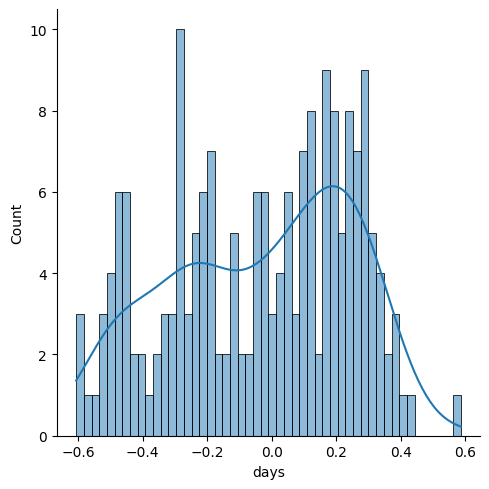

In [ ]:
sns.displot(residual, bins=50,kde=True)

In [ ]:
# to run the second regression by deliting some variables to see if MAE is improved

In [ ]:
df.columns

Index(['id', 'days', 'placed', 'interviews', 'applications', 'track_Data',
       'track_Design', 'track_Marketing', 'track_PSO', 'track_SWE',
       'track_Web', 'employment_status_Contractor',
       'employment_status_Employed Full-Time',
       'employment_status_Employed Part-Time', 'employment_status_Student',
       'employment_status_Unemployed', 'education_Bachelor',
       'education_College', 'education_High School', 'education_Master',
       'education_PHD', 'job_search_0-1 month', 'job_search_1-2 months',
       'job_search_3-5 months', 'job_search_6-12 months',
       'job_search_Over a year', 'challenge_Behavioral interviewing',
       'challenge_Figuring out which jobs to apply for',
       'challenge_Getting past final round interviews',
       'challenge_Getting past mid-stage interviews',
       'challenge_Getting past phone screens',
       'challenge_Hearing back on my applications',
       'challenge_Lack of relevant experience', 'challenge_Resume gap',
       'c

In [ ]:
x1 = df.drop(columns={'days','placed', 'id','track_Data',
       'track_Design', 'track_Marketing', 'track_PSO', 'track_SWE',
       'track_Web'})
y1 = df ['days']
x1_train, x1_test, y1_train, y1_test = train_test_split (x1, y1, test_size=0.2, random_state=101)
lr =LinearRegression()
lr = lr.fit(x1_train, y1_train)
print(lr.intercept_)
print(lr.coef_)
prediction = lr.predict(x1_test)
residual = prediction -y1_test
print('MAE:', metrics.mean_absolute_error(y1_test, prediction))

12045023385584.559
[-1.06448649e-01 -2.66784960e-01 -7.50036549e+11 -7.50036549e+11
 -7.50036549e+11 -7.50036549e+11 -7.50036549e+11  1.52723291e+12
  1.52723291e+12  1.52723291e+12  1.52723291e+12  1.52723291e+12
  1.07540655e+12  1.07540655e+12  1.07540655e+12  1.07540655e+12
  1.07540655e+12 -1.15015125e+11 -1.15015125e+11 -1.15015125e+11
 -1.15015125e+11 -1.15015125e+11 -1.15015125e+11 -1.15015125e+11
 -1.15015125e+11 -1.15015125e+11 -1.15015125e+11 -1.37216220e+13
 -1.37216220e+13 -1.37216220e+13 -1.37216220e+13 -6.09892181e+10
 -6.09892181e+10 -6.09892181e+10 -6.09892181e+10 -6.09892181e+10
 -6.09892181e+10 -6.09892181e+10 -6.09892181e+10]
MAE: 0.25710284014682167


In [ ]:
x2 = df.drop(columns={'days','placed', 'id','track_Data',
       'track_Design', 'track_Marketing', 'track_PSO', 'track_SWE',
       'track_Web','employment_status_Contractor',
       'employment_status_Employed Full-Time',
       'employment_status_Employed Part-Time', 'employment_status_Student',
       'employment_status_Unemployed'})
y2 = df ['days']
x2_train, x2_test, y2_train, y2_test = train_test_split (x2, y2, test_size=0.2, random_state=101)
lr =LinearRegression()
lr = lr.fit(x2_train, y2_train)
prediction = lr.predict(x2_test)
residual = prediction -y2_test
print('MAE:', metrics.mean_absolute_error(y2_test, prediction))

MAE: 0.239190874766911


In [ ]:
x3 = df.drop(columns={'days','placed', 'id','track_Data',
       'track_Design', 'track_Marketing', 'track_PSO', 'track_SWE',
       'track_Web','employment_status_Contractor',
       'employment_status_Employed Full-Time',
       'employment_status_Employed Part-Time', 'employment_status_Student',
       'employment_status_Unemployed','challenge_Behavioral interviewing',
       'challenge_Figuring out which jobs to apply for',
       'challenge_Getting past final round interviews',
       'challenge_Getting past mid-stage interviews',
       'challenge_Getting past phone screens',
       'challenge_Hearing back on my applications',
       'challenge_Lack of relevant experience', 'challenge_Resume gap',
       'challenge_Technical interviewing', 'challenge_Technical skills'})
y3 = df ['days']
x3_train, x3_test, y3_train, y3_test = train_test_split (x3, y3, test_size=0.2, random_state=101)
lr =LinearRegression()
lr = lr.fit(x3_train, y3_train)
prediction = lr.predict(x3_test)
residual = prediction -y3_test
print('MAE:', metrics.mean_absolute_error(y3_test, prediction))

MAE: 0.2325783393340895


In [ ]:
import pickle
pickle.dump (lr, open('place_Estimater.pkl', 'wb'))

im going to use LogisticRegression and 'placed' is my dependant variable

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x4 = df.drop(columns={'placed', 'id'})
y4 = df ['placed']
x4_train, x4_test, y4_train, y4_test = train_test_split (x4, y4, test_size=0.2, random_state=101)
logreg = LogisticRegression()
logreg = logreg.fit(x4_train, y4_train)
prediction = logreg.predict(x4_test)
residual = prediction -y4_test

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:

from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix (y4_test,prediction)

array([[  0,   3],
       [  0, 186]])

In [ ]:
len(y4_test)

189

In [ ]:
0+3+0+186

189

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report (y4_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.98      1.00      0.99       186

    accuracy                           0.98       189
   macro avg       0.49      0.50      0.50       189
weighted avg       0.97      0.98      0.98       189



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y4_test,prediction)

0.9841269841269841